<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Filter-data" data-toc-modified-id="Filter-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Filter data</a></span></li><li><span><a href="#Signal-to-spectral" data-toc-modified-id="Signal-to-spectral-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Signal to spectral</a></span></li><li><span><a href="#Colormap-of-power-spectrum" data-toc-modified-id="Colormap-of-power-spectrum-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Colormap of power spectrum</a></span></li></ul></div>

In [1]:
from hdf5storage import loadmat
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import seaborn as sns

In [2]:
def signal_filter(data, sf=305., btype='lowpass', low=0.5, high=30):
    """
    Filter the signal data, use butter filter in scipy
    
    Parameters
    ----------
    data : 1D-array
        Signal data need to be filtered.
    sf : float
        Sampling frequency of signal data. Default is 305.
    btype : {'lowpass', 'highpass', 'bandpass'}, optional
        The type of filter. Default is 'lowpass'.
    low : float
        Higher than this frequency can pass, used in 'highpass' and 'bandpass'
        filter. Default is 0.5.
    high : float
        Lower than this frequency can pass, used in 'lowpass' and 'bandpass' 
        filyer. Default is 30.
    
    Returns
    ----------
    filtered_data : 1D-array
        Filtered data of signal data using butter filter
    
    """
    if btype == 'lowpass':
        fnorm = high / (.5 * sf)
    elif btype == 'highpass':
        fnorm = low / (.5 * sf)
    elif btype == 'bandpass':
        fnorm = np.divide([low, high], .5 * sf)
    else:
        raise ValueError("'%s' is an invalid type for filter, "
                         "you can only choose 'lowpass', 'highpass' or 'bandpass'" 
                         % btype)
    
    # Use irrfilter of scipy.signal to construct a filter
    b, a = signal.iirfilter(N=3, Wn=fnorm, btype=btype, analog=False, 
                            output='ba', ftype='butter', fs=None) 
    
    filtered_data = signal.filtfilt(b=b, a=a, x=data)
    
    return filtered_data

def plot_signal(ax, eg_len, data, sf=None, bg_color='None',
                title=None, lw=1, c='k'):
    """
    Plot signal
    
    Parameters
    ----------
    ax : matplotlib.pyplot axes
        Axes to plot signal. Should be a subplot axes of matplotlib.pyplot.subplots.
    time : 1-D array
        X axis, time array.
    data : 1-D array
        Signal data going to be plotted.
    sf : float
        Sampling frequency of signal data
    title : str
        Axes title
    lw : float
        Line width of signal data
    c : str
        Color of signal data line
        
    Returns
    ----------
    ax : matplotlib.pyplot axes
        Plotted axes
    """
    
    time = np.arange(0, sf*eg_len)
    ax.axvspan(xmin=0, xmax=eg_len*sf, color=bg_color, alpha=0.3)
    ax.plot(time, data, lw=1, c='k')
    ax.set_xlabel('Time (Sec)')
    ax.set_xlim(0, eg_len*sf)
    ax.set_xticks(range(0, int(eg_len*sf+1), int(sf*2)), range(0, eg_len+1, 2))
    ax.set_title(title)
    
    return ax

def plot_3_states(wake_eg, nrem_eg, rem_eg, eg_len, sf, 
                 wake_title, nrem_title, rem_title):
    """
    Plot 3 state's signal
    """
    fig, ax = plt.subplots(3, 1, figsize=(20, 9))
    fig.tight_layout(h_pad=5)
    time = np.arange(0, sf*eg_len)

    # Wake example data
    ax[0] = plot_signal(ax=ax[0], eg_len=eg_len, data=wake_eg, 
                        sf=sf, bg_color='lightgray', 
                        title=wake_title)

    # NREM example data
    ax[1] = plot_signal(ax=ax[1], eg_len=eg_len, data=nrem_eg, 
                        sf=sf, bg_color='orange', 
                        title=nrem_title)


    # REM example data
    ax[2] = plot_signal(ax=ax[2], eg_len=eg_len, data=rem_eg, 
                        sf=sf, bg_color='skyblue', 
                        title=rem_title)
    plt.show()

## Load data

In [5]:
wake_data = list(loadmat(r'E:/workplace/EEGProcessing/00_DATA/20240114_0700_WXQ_3mice_24h_7pin_baseline/mouse1/merged_data/wake_data.mat').values())[-1][3]
nrem_data = list(loadmat(r'E:/workplace/EEGProcessing/00_DATA/20240114_0700_WXQ_3mice_24h_7pin_baseline/mouse1/merged_data/nrem_data.mat').values())[-1][1]
rem_data = list(loadmat(r'E:/workplace/EEGProcessing/00_DATA/20240114_0700_WXQ_3mice_24h_7pin_baseline/mouse1/merged_data/rem_data.mat').values())[-1][3]

# Sampling frequency
sf = 305
# example data length (seconds)
eg_len = 30
# example data of 3 states
wake_eg = wake_data[:eg_len*sf]
nrem_eg = nrem_data[:eg_len*sf]
rem_eg = rem_data[:eg_len*sf]

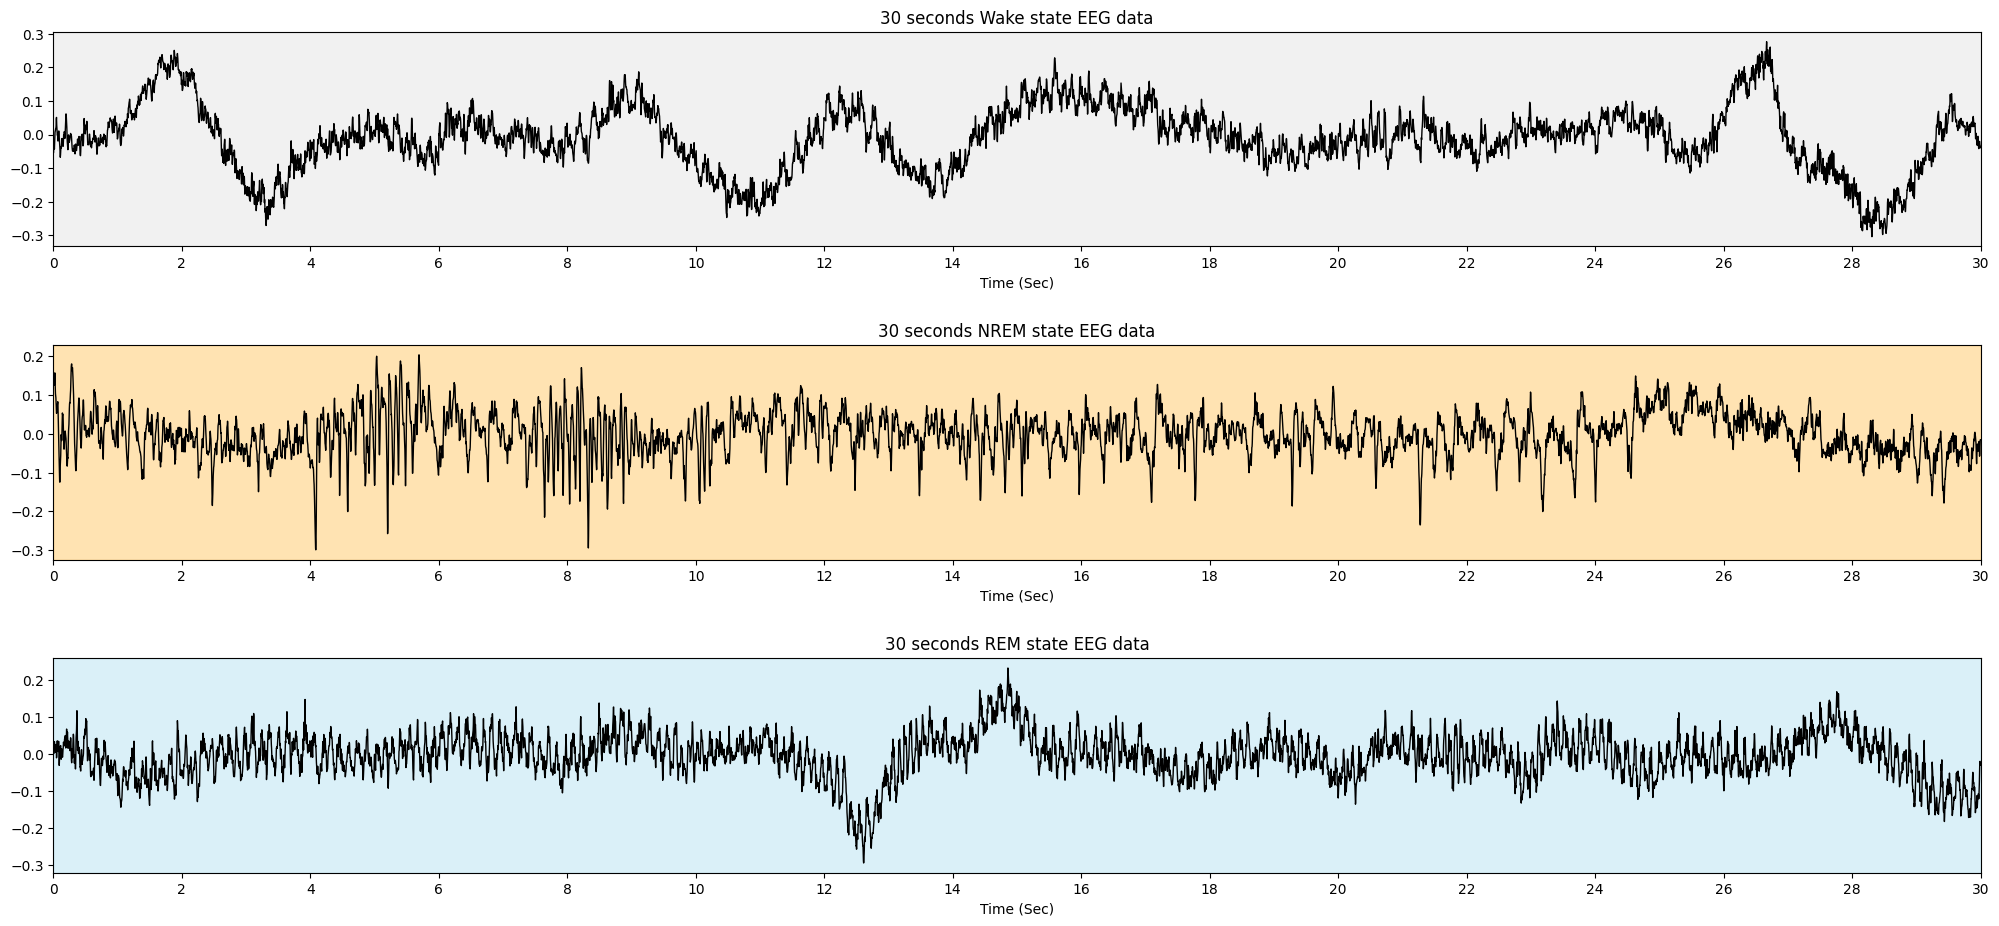

In [6]:
plot_3_states(wake_eg=wake_eg, nrem_eg=nrem_eg, rem_eg=rem_eg, 
              eg_len=eg_len, sf=sf, 
              wake_title=f"{eg_len} seconds Wake state EEG data", 
              nrem_title=f"{eg_len} seconds NREM state EEG data", 
              rem_title=f"{eg_len} seconds REM state EEG data")

## Filter data


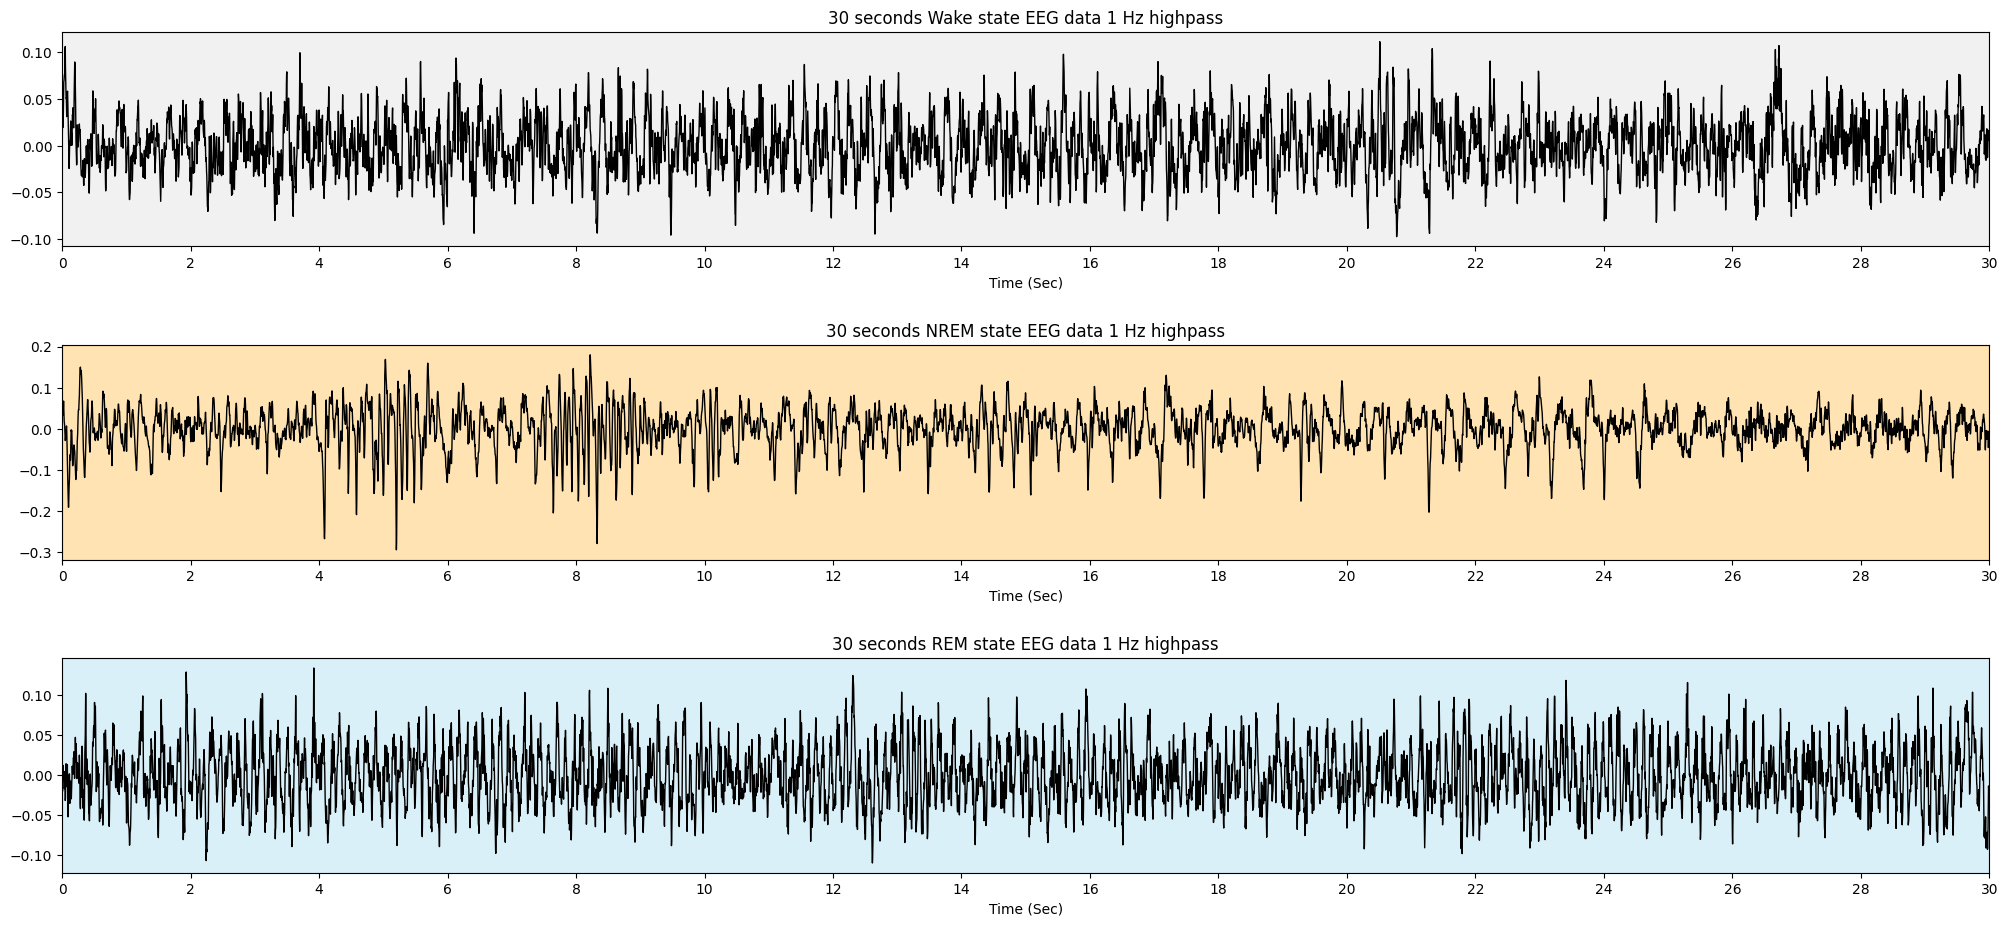

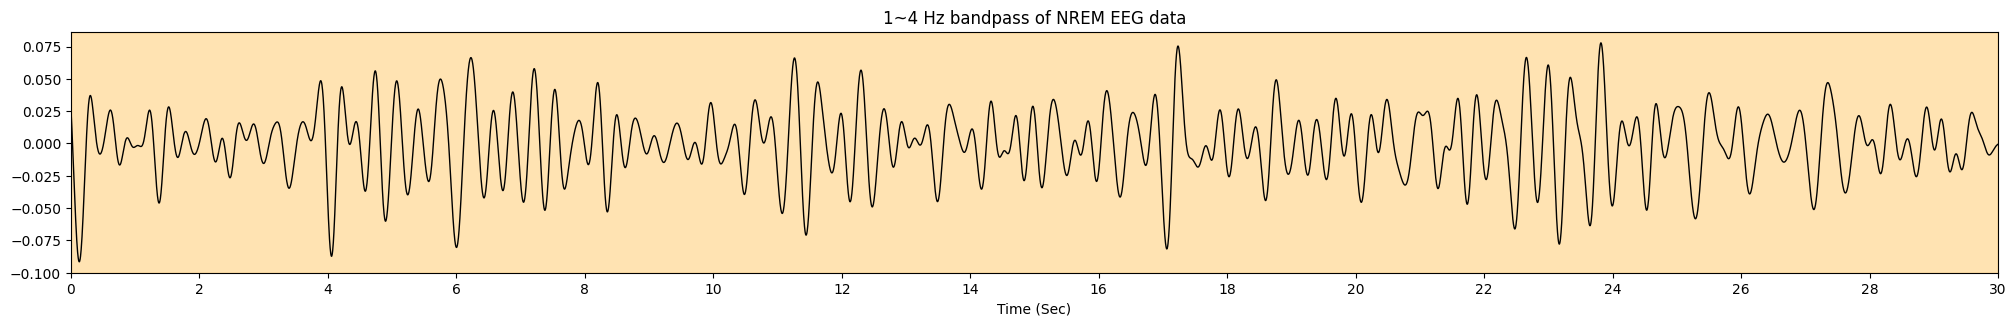

In [8]:
# With 1 Hz highpass filter, we can filter the noises under 1 Hz
HP_1Hz_wake_eg = signal_filter(data=wake_eg, sf=sf, btype='highpass', low=1)
HP_1Hz_nrem_eg = signal_filter(data=nrem_eg, sf=sf, btype='highpass', low=1)
HP_1Hz_rem_eg = signal_filter(data=rem_eg, sf=sf, btype='highpass', low=1)

plot_3_states(wake_eg=HP_1Hz_wake_eg, nrem_eg=HP_1Hz_nrem_eg, 
              rem_eg=HP_1Hz_rem_eg, eg_len=eg_len, sf=sf, 
              wake_title=f"{eg_len} seconds Wake state EEG data 1 Hz highpass", 
              nrem_title=f"{eg_len} seconds NREM state EEG data 1 Hz highpass", 
              rem_title=f"{eg_len} seconds REM state EEG data 1 Hz highpass")

# 1~4 Hz bandpass of nrem data, get the slow wave (delta)
BP_1_4Hz_nrem = signal_filter(data=nrem_eg, sf=sf, 
                               btype='bandpass', low=1, high=4)
fig, ax = plt.subplots(1, 1, figsize=(20, 3))

fig.tight_layout(h_pad=5)
ax = plot_signal(ax=ax, eg_len=eg_len, data=BP_1_4Hz_nrem, sf=sf, 
                 bg_color='orange', title='1~4 Hz bandpass of NREM EEG data')

## Signal to spectral

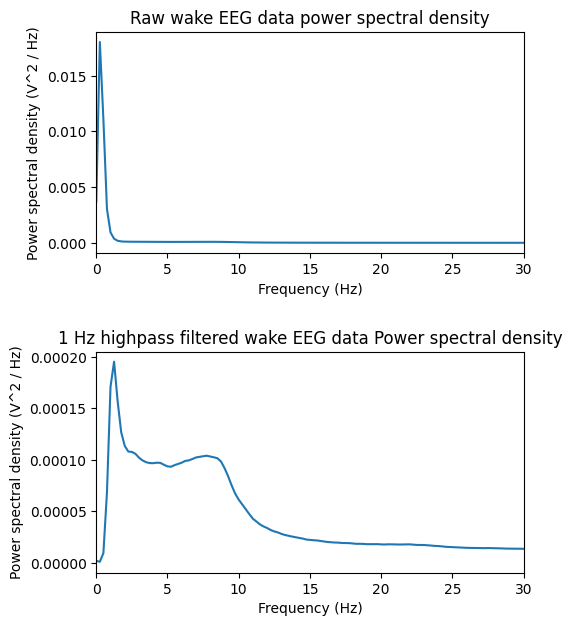

In [9]:
# If we use the raw data to do spectral transform, the low frequency (under 1 Hz)
# will influence the result, see the following two figures for comparasion

# Raw data (the nperseg and noverlap will have explanation in the following section)
freq, Px_raw = signal.welch(x=wake_data, fs=sf, nperseg=4*sf, noverlap=3*sf)

# Filtered data
wake_data_filtered = signal_filter(data=wake_data, sf=sf, btype='highpass', low=1)
freq, Px_filtered = signal.welch(x=wake_data_filtered, fs=sf, 
                                 nperseg=4*sf, noverlap=3*sf)

# plot the two figures
fig, ax = plt.subplots(2, 1, figsize=(5, 6))
fig.tight_layout(h_pad=5)
ax[0].plot(freq, Px_raw)
ax[0].set_xlim([0, 30])
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('Power spectral density (V^2 / Hz)')
ax[0].set_title('Raw wake EEG data power spectral density')

ax[1].plot(freq, Px_filtered)
ax[1].set_xlim([0, 30])
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Power spectral density (V^2 / Hz)')
ax[1].set_title('1 Hz highpass filtered wake EEG data Power spectral density')
del wake_data_filtered
plt.show()

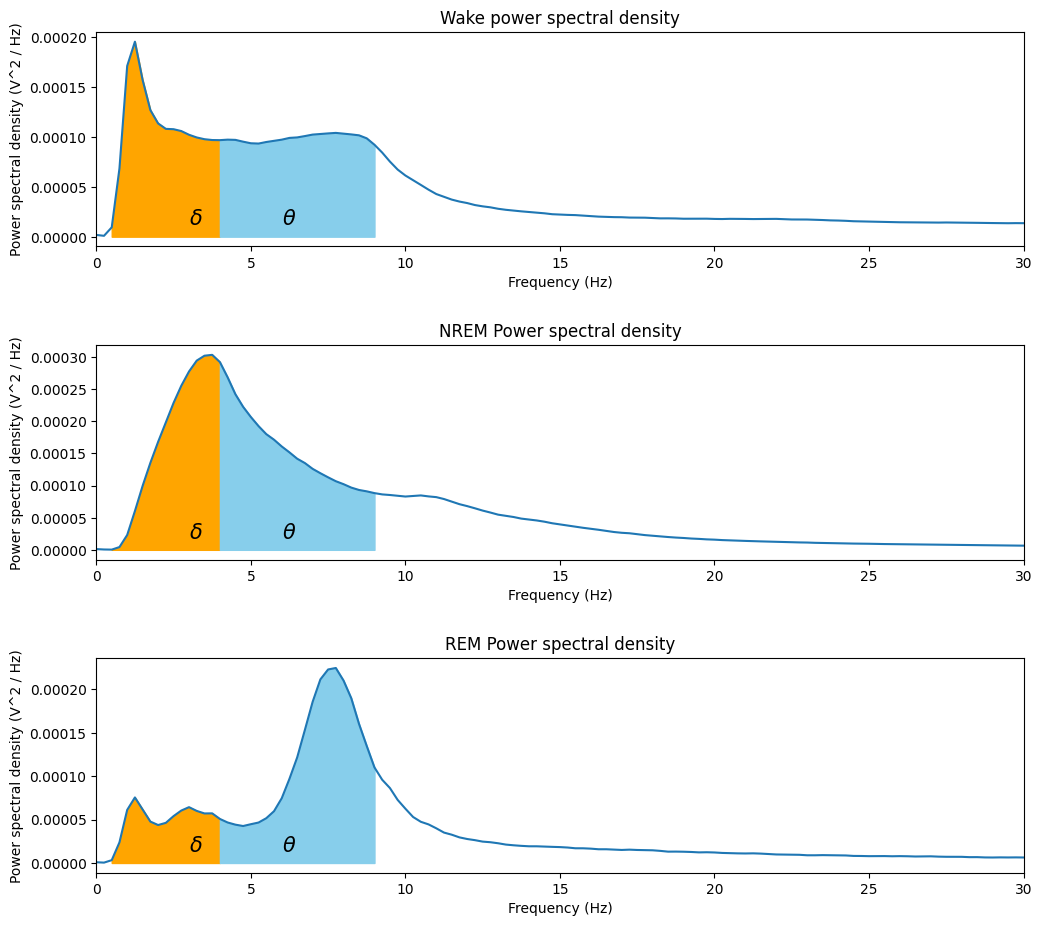

In [10]:
# Here we highpass 1 Hz data, filter the noises
wake_data = signal_filter(data=wake_data, sf=sf, btype='highpass', low=1)
nrem_data = signal_filter(data=nrem_data, sf=sf, btype='highpass', low=1)
rem_data = signal_filter(data=rem_data, sf=sf, btype='highpass', low=1)

# Nperseg -> n data point(s) per segment
# The frequency resolution should be sampling frequency / nperseg
# Here our lowest frequency should be 0.25 Hz, so nperseg is
# sf / 0.25 = 4 * sf

# noverlap means two segments' overlap data points
# Here we use 3 * sf to control the time resolution of 1 second
freq, Px_wake = signal.welch(x=wake_data, fs=sf, nperseg=4*sf, noverlap=3*sf)
freq, Px_nrem = signal.welch(x=nrem_data, fs=sf, nperseg=4*sf, noverlap=3*sf)
freq, Px_rem = signal.welch(x=rem_data, fs=sf, nperseg=4*sf, noverlap=3*sf)

# Find the feature band for different states
delta = [0.5, 4]
theta = [4, 9]
delta_idx = np.logical_and(freq>=delta[0], freq<=delta[1])
theta_idx = np.logical_and(freq>=theta[0], freq<=theta[1])

fig, ax = plt.subplots(3, 1, figsize=(10, 9))
fig.tight_layout(h_pad=5)

ax[0].plot(freq, Px_wake)
ax[0].fill_between(freq, Px_wake, where=delta_idx, color='orange')
ax[0].fill_between(freq, Px_wake, where=theta_idx, color='skyblue')
ax[0].text(3/30, 0.1, f'$\\delta$', fontsize=15, transform=ax[0].transAxes)
ax[0].text(6/30, 0.1, f'$\\theta$', fontsize=15, transform=ax[0].transAxes)
ax[0].set_xlim([0, 30])
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('Power spectral density (V^2 / Hz)')
ax[0].set_title('Wake power spectral density')

ax[1].plot(freq, Px_nrem)
ax[1].fill_between(freq, Px_nrem, where=delta_idx, color='orange')
ax[1].fill_between(freq, Px_nrem, where=theta_idx, color='skyblue')
ax[1].text(3/30, 0.1, f'$\\delta$', fontsize=15, transform=ax[1].transAxes)
ax[1].text(6/30, 0.1, f'$\\theta$', fontsize=15, transform=ax[1].transAxes)
ax[1].set_xlim([0, 30])
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Power spectral density (V^2 / Hz)')
ax[1].set_title('NREM Power spectral density')

ax[2].plot(freq, Px_rem)
ax[2].fill_between(freq, Px_rem, where=delta_idx, color='orange')
ax[2].fill_between(freq, Px_rem, where=theta_idx, color='skyblue')
ax[2].text(3/30, 0.1, f'$\\delta$', fontsize=15, transform=ax[2].transAxes)
ax[2].text(6/30, 0.1, f'$\\theta$', fontsize=15, transform=ax[2].transAxes)
ax[2].set_xlim([0, 30])
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Power spectral density (V^2 / Hz)')
ax[2].set_title('REM Power spectral density')
plt.show()

## Colormap of power spectrum

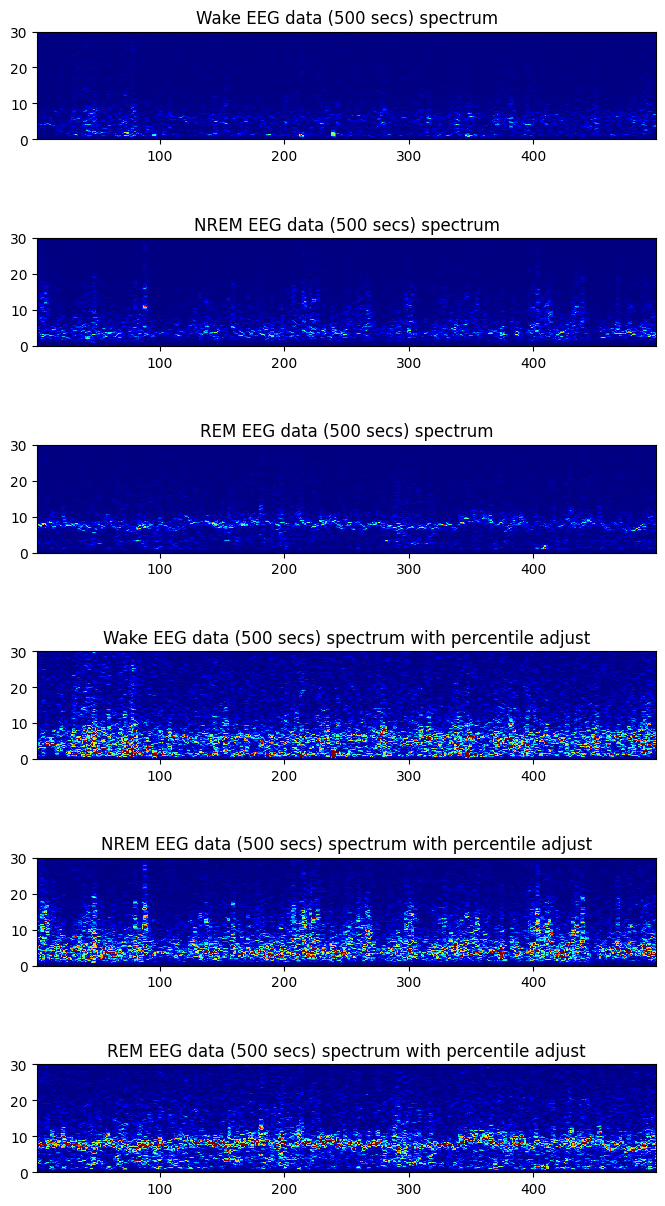

In [11]:
# 3 state's data spectrum
# Here the nperseg and noverlap is the same with power spectral density
freq, T, Sx_wake = signal.spectrogram(wake_data[:500*sf], 
                                      fs=sf, noverlap=sf*3, nperseg=sf*4)

freq, T, Sx_nrem = signal.spectrogram(nrem_data[:500*sf], 
                                      fs=sf, noverlap=sf*3, nperseg=sf*4)

freq, T, Sx_rem = signal.spectrogram(rem_data[:500*sf], 
                                     fs=sf, noverlap=sf*3, nperseg=sf*4)

plt.close()
fig, ax = plt.subplots(6, 1, figsize=(7, 12))
fig.tight_layout(h_pad=5)

cmap = plt.colormaps.get_cmap('jet')
ax[0].set_ylim([0, 30])
ax[0].pcolormesh(T, freq, Sx_wake, cmap=cmap)
ax[0].set_title('Wake EEG data (500 secs) spectrum')

ax[1].set_ylim([0, 30])
ax[1].pcolormesh(T, freq,  Sx_nrem, cmap=cmap)
ax[1].set_title('NREM EEG data (500 secs) spectrum')

ax[2].set_ylim([0, 30])
ax[2].pcolormesh(T, freq, Sx_rem, cmap=cmap)
ax[2].set_title('REM EEG data (500 secs) spectrum')

# With color percentile
percentile = 99.8

ax[3].set_ylim([0, 30])
ax[3].pcolormesh(T, freq, Sx_wake, cmap=cmap,
                 vmax=np.percentile(Sx_wake, percentile))
ax[3].set_title('Wake EEG data (500 secs) spectrum with percentile adjust')

ax[4].set_ylim([0, 30])
ax[4].pcolormesh(T, freq,  Sx_nrem, cmap=cmap,
                 vmax=np.percentile(Sx_nrem, percentile))
ax[4].set_title('NREM EEG data (500 secs) spectrum with percentile adjust')

ax[5].set_ylim([0, 30])
ax[5].pcolormesh(T, freq, Sx_rem, cmap=cmap,
                 vmax=np.percentile(Sx_rem, percentile))
ax[5].set_title('REM EEG data (500 secs) spectrum with percentile adjust')

plt.show()